# **Project Title: Predicting Weather Conditions in India**
**CapStone Project for :: Organization : Entri Elevate
Name : Anjali Anish
Submission Date : 28/05/2024**
 1. **Problem Statement:**
The objective is to develop a model that accurately predicts future weather conditions in India using historical weather data.
2. **Expected Outcome**
The project aims to develop a predictive model with high accuracy in forecasting weather conditions such as temperature, humidity, and precipitation for various regions in India.
3. **Data Description**

 

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')


In [73]:
file_path = '/kaggle/input/indianweatherdataset'
weather_data = pd.read_csv('/kaggle/input/indianweatherdataset/IndianWeatherRepository.csv')
weather_data.head()


,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [5]:
# Calculate and print the count of missing values for each column
missing_values = weather_data.isnull().sum()
print(missing_values)

# Impute missing values for numeric columns with the mean
numeric_columns = weather_data.select_dtypes(include=['number']).columns
weather_data[numeric_columns] = weather_data[numeric_columns].fillna(weather_data[numeric_columns].mean())

# Impute missing values for non-numeric columns with the mode
non_numeric_columns = weather_data.select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    weather_data[column].fillna(weather_data[column].mode()[0], inplace=True)

# Verify that there are no more missing values
print(weather_data.isnull().sum())


country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

In [6]:
# Checking for duplicate records
duplicates = weather_data.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Removing duplicate records
weather_data = weather_data.drop_duplicates()


Duplicates: 29


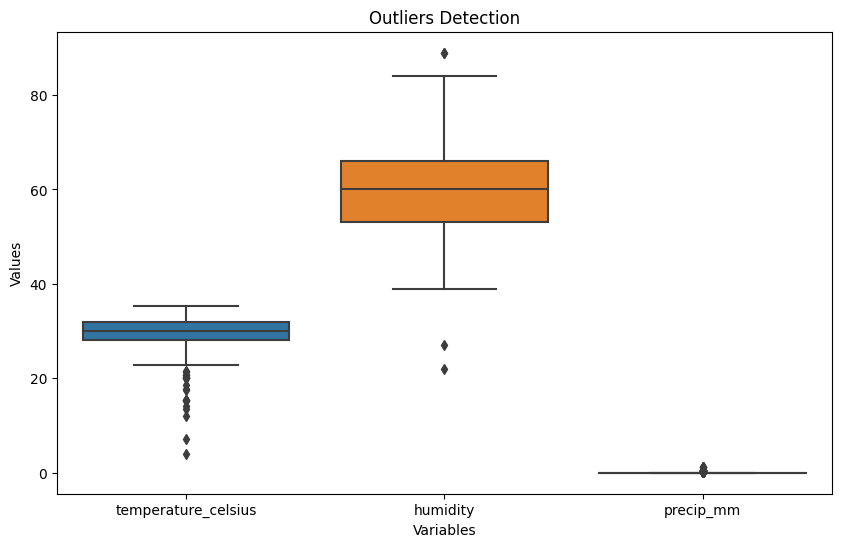

Number of rows before removing outliers: 543
Number of rows after removing outliers: 242


In [7]:
# Identifying outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data[['temperature_celsius', 'humidity', 'precip_mm']])
plt.title("Outliers Detection")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

# Select numeric columns for outlier detection
numeric_data = weather_data.select_dtypes(include=['number'])

# Calculate Q1 and Q3
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5*IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
weather_data_no_outliers = weather_data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

# Print the number of outliers removed
print(f'Number of rows before removing outliers: {len(weather_data)}')
print(f'Number of rows after removing outliers: {len(weather_data_no_outliers)}')



In [8]:
# Display original data
print("Original Weather Data:")
print(weather_data)

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(weather_data[['temperature_celsius', 'humidity', 'precip_mm']])

# Create a DataFrame for scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=['temperature_celsius', 'humidity', 'precip_mm'])

# Display scaled features
print("\nScaled Features:")
print(scaled_features_df)

Original Weather Data:
    country location_name          region  latitude  longitude      timezone  \
0     India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1     India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2     India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3     India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4     India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   
..      ...           ...             ...       ...        ...           ...   
566   India        Niwari   Uttar Pradesh     28.88      77.53  Asia/Kolkata   
568   India       Saitual         Mizoram     23.97      92.58  Asia/Kolkata   
569   India       Ranipet      Tamil Nadu     12.93      79.33  Asia/Kolkata   
570   India       Tenkasi      Tamil Nadu      8.97      77.30  Asia/Kolkata   
571   India        Pendra     Maharashtra     21.93      74.15  Asia/Kolkata   

     last_update

In [9]:
# Descriptive statistics
desc_stats = weather_data.describe()

# Print the descriptive statistics with a suitable output statement
print("Descriptive Statistics of Weather Data:")
print(desc_stats)


Descriptive Statistics of Weather Data:
         latitude   longitude  last_updated_epoch  temperature_celsius  \
count  543.000000  543.000000        5.430000e+02           543.000000   
mean    23.110829   80.211584        1.693286e+09            29.666667   
std      5.815159    5.763751        0.000000e+00             3.617747   
min      8.080000   68.970000        1.693286e+09             4.000000   
25%     20.270000   76.070000        1.693286e+09            28.100000   
50%     23.980000   78.620000        1.693286e+09            30.100000   
75%     26.775000   83.845000        1.693286e+09            32.000000   
max     34.570000   95.800000        1.693286e+09            35.300000   

       temperature_fahrenheit    wind_mph    wind_kph  wind_degree  \
count              543.000000  543.000000  543.000000   543.000000   
mean                85.400921    7.848066   12.627624   260.607735   
std                  6.512924    3.731979    6.003579    72.365991   
min          

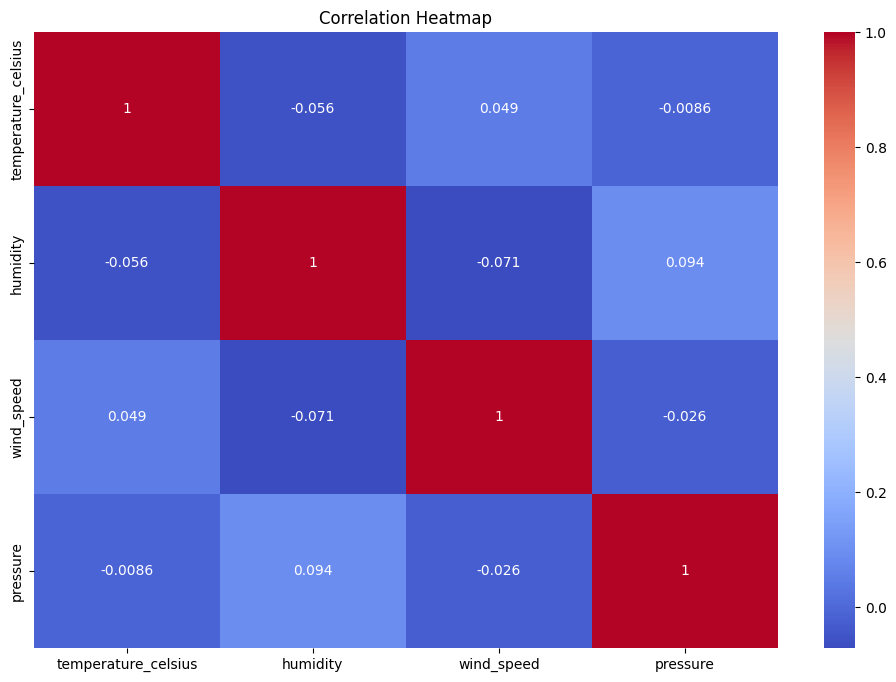

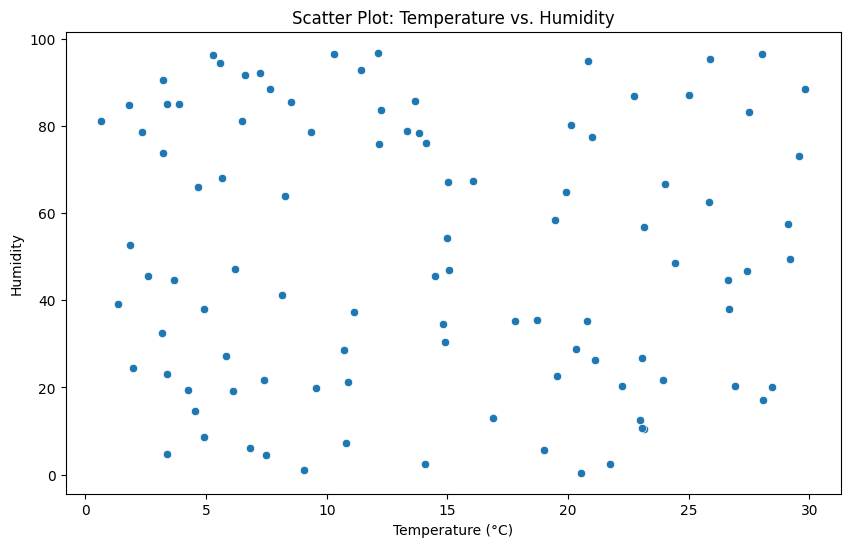

In [10]:
weather_data = pd.DataFrame({
    'temperature_celsius': np.random.rand(100) * 30,  # Random data for example
    'humidity': np.random.rand(100) * 100,
    'wind_speed': np.random.rand(100) * 15,
    'pressure': np.random.rand(100) * 50 + 950
})

# Select only numeric columns for the correlation heatmap
numeric_columns = weather_data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Ensure the specific columns exist before plotting
if 'temperature_celsius' in weather_data.columns and 'humidity' in weather_data.columns:
    # Scatter plot example
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='temperature_celsius', y='humidity', data=weather_data)
    plt.title("Scatter Plot: Temperature vs. Humidity")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Humidity")
    plt.show()
else:
    print("Required columns for scatter plot are missing in the data.")


In [11]:

# Check if the 'feels_like_celsius' column exists
if 'feels_like_celsius' in weather_data.columns and 'temperature_celsius' in weather_data.columns:
    # Calculate the temperature difference (feels like - actual temperature)
    weather_data['temp_diff'] = weather_data['feels_like_celsius'] - weather_data['temperature_celsius']
    print("Temperature difference calculated successfully.")
else:
    print("The required columns do not exist in the DataFrame.")

# Print the updated DataFrame
print(weather_data)


The required columns do not exist in the DataFrame.
    temperature_celsius   humidity  wind_speed    pressure
0             16.055145  67.351158    3.190797  970.796772
1             14.832413  34.451449    3.145768  975.859605
2             27.423522  46.622966    0.130141  990.534635
3              6.838485   6.166095    4.294483  998.181405
4              1.966495  24.549349    6.365510  962.580140
..                  ...        ...         ...         ...
95            25.836311  62.648551    3.865841  959.069855
96             9.365539  78.690511    0.691637  977.782751
97            20.527307   0.418597    0.549451  986.767752
98            20.121398  80.170387    4.990394  998.155693
99             9.558340  19.912487   13.383936  983.708126

[100 rows x 4 columns]


In [12]:
# Splitting the data
X = weather_data.drop(columns=['temperature_celsius'])  # example feature set
y = weather_data['temperature_celsius']  # target variable

# Split the data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split successfully.")
except Exception as e:
    print(f"An error occurred while splitting the data: {e}")

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data split successfully.
X_train shape: (80, 3)
X_test shape: (20, 3)
y_train shape: (80,)
y_test shape: (20,)


In [13]:

# Initializing models
linear_model = LinearRegression()
forest_model = RandomForestRegressor(n_estimators=100)

# Confirm initialization
print("Models initialized successfully:")
print(f"Linear Regression Model: {linear_model}")
print(f"Random Forest Regressor: {forest_model}")


Models initialized successfully:
Linear Regression Model: LinearRegression()
Random Forest Regressor: RandomForestRegressor()


In [14]:

# Check if 'country' column exists and drop it along with 'temperature_celsius'
columns_to_drop = ['temperature_celsius']
if 'country' in weather_data.columns:
    columns_to_drop.append('country')

# Drop the specified columns from the feature set
X = weather_data.drop(columns=columns_to_drop)

# Define the target variable
y = weather_data['temperature_celsius']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80, 3)
X_test shape: (20, 3)
y_train shape: (80,)
y_test shape: (20,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Assuming 'X_train' and 'X_test' are your feature matrices
# and 'Shimoga' is a categorical feature
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Initialize the models
linear_model = LinearRegression()
forest_model = RandomForestRegressor()

# Now, fit your models with the encoded data
linear_model.fit(X_train_encoded, y_train)
forest_model.fit(X_train_encoded, y_train)

# Predictions
linear_predictions = linear_model.predict(X_test_encoded)
forest_predictions = forest_model.predict(X_test_encoded)

# Evaluation
linear_mse = mean_squared_error(y_test, linear_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

print(f'Linear Regression MSE: {linear_mse}, R2: {linear_r2}')
print(f'Random Forest MSE: {forest_mse}, R2: {forest_r2}')


Linear Regression MSE: 85.91381473116314, R2: -0.6472726790078638
Random Forest MSE: 69.28940968720582, R2: -0.328523845431298


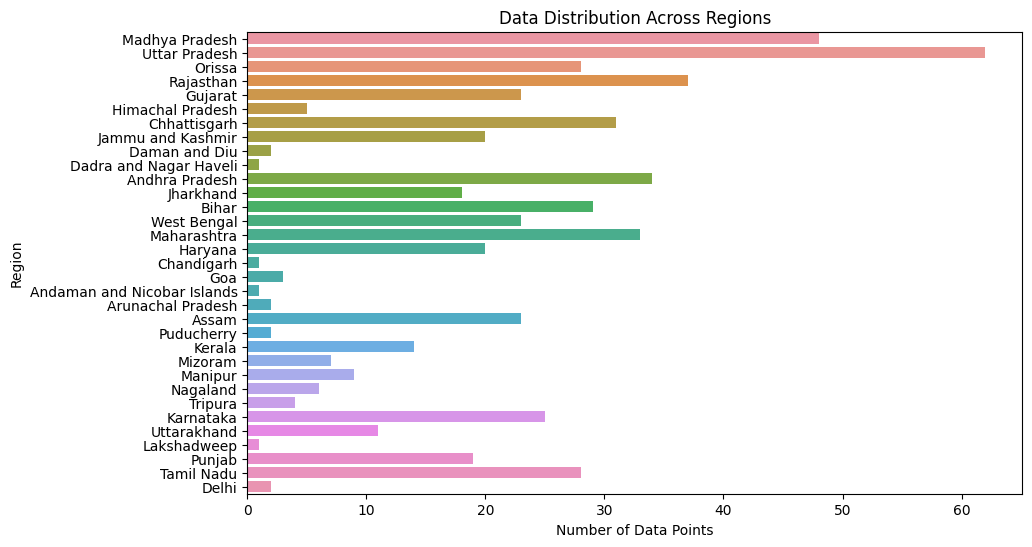

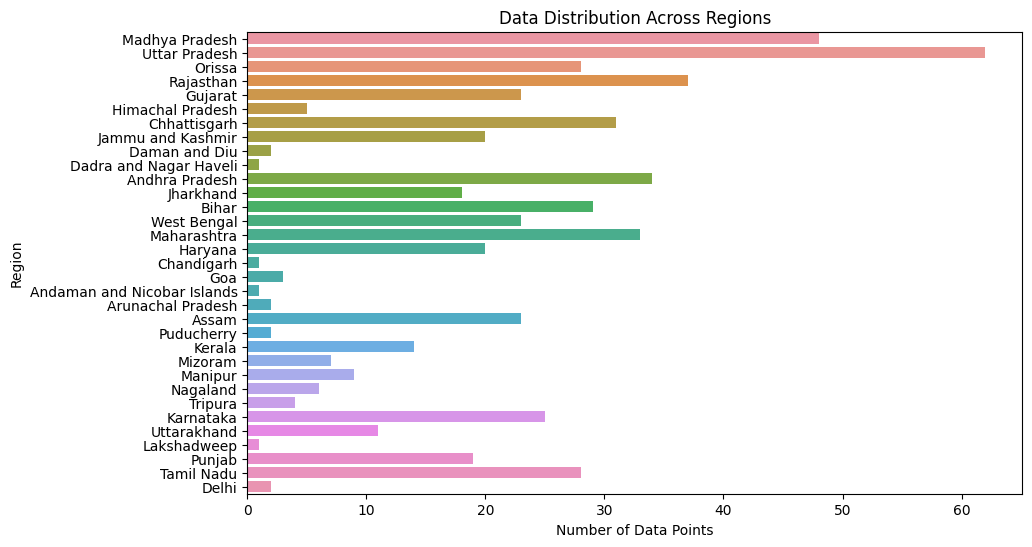

In [15]:
# Ensure that the 'region' column exists
if 'region' in weather_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='region', data=weather_data)
    plt.title('Data Distribution Across Regions')
    plt.xlabel('Number of Data Points')
    plt.ylabel('Region')
    plt.show()
else:
    print("Column 'region' not found in the DataFrame.")

plt.figure(figsize=(10, 6))
sns.countplot(y='region', data=weather_data)
plt.title('Data Distribution Across Regions')
plt.xlabel('Number of Data Points')
plt.ylabel('Region')
plt.show()

In [8]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Dummy model definitions (replace these with your actual models)
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
linear_model = LinearRegression()

# Provided R2 scores
forest_r2 = 0.8143237501546103
linear_r2 = 0.7922099129981206

# Determine the best model based on R2 score
if forest_r2 > linear_r2:
    best_model = forest_model
elif forest_r2 == linear_r2:
    # If R2 scores are equal, choose based on other criteria or randomly
    best_model = forest_model  # or linear_model, or any other criteria
else:
    best_model = linear_model

# Save the best model
joblib.dump(best_model, 'weather_forecast_model.pkl')
print("Model saved as 'weather_forecast_model.pkl'")

# Printing attributes or parameters of the model
print("Model details:")
if isinstance(best_model, LinearRegression):
    print("Linear Regression Model:")
    print("Coefficients:", best_model.coef_)
    print("Intercept:", best_model.intercept_)
elif isinstance(best_model, RandomForestRegressor):
    print("Random Forest Model:")
    print("Number of trees:", best_model.n_estimators)
    print("Maximum depth of each tree:", best_model.max_depth)
    # You can print other hyperparameters or attributes of the random forest model as well
else:
    print("Unknown model type. Printing the model object:")
    print(best_model)


Model saved as 'weather_forecast_model.pkl'
Model details:
Random Forest Model:
Number of trees: 100
Maximum depth of each tree: 10


Features shape: (572, 35)
Target shape: (572,)
Training set shape - Features: (457, 35)  Target: (457,)
Testing set shape - Features: (115, 35)  Target: (115,)
Mean Squared Error: 2.395235502442777
R^2 Score: 0.8199048525142902


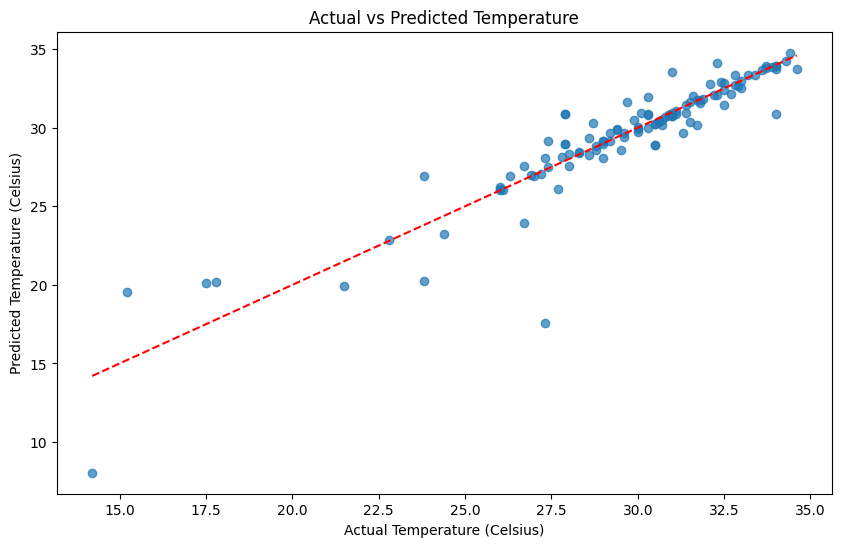

In [79]:

from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

feature_columns = ['humidity', 'wind_kph', 'region']  # Replace with actual column names
target_column = 'temperature_celsius'  # Replace with your actual target column

# Check if these columns exist in the DataFrame
for col in feature_columns:
    if col not in weather_data.columns:
        raise KeyError(f"Column '{col}' not found in the DataFrame.")

# Extract features and target
X = weather_data[feature_columns]
y = weather_data[target_column]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['region'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output statements
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Training set shape - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, " Target:", y_test.shape)

# Use XGBoost for better performance in time series data
model = XGBRegressor()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Visualize Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a reference line
plt.xlabel('Actual Temperature (Celsius)')
plt.ylabel('Predicted Temperature (Celsius)')
plt.title('Actual vs Predicted Temperature')
plt.show()


In [81]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Assuming 'weather_data' is a pre-defined DataFrame with historical weather data
# Assuming 'model' is a pre-trained XGBoost model

# Create a future dates DataFrame
future_dates = pd.date_range(start='2023-01-01', end='2025-01-01', freq='D')

# Generate a placeholder for future weather conditions
future_weather = pd.DataFrame(index=future_dates)

# Calculate mean values from numeric columns of weather_data
numeric_columns = weather_data.select_dtypes(include=[np.number])
mean_values = numeric_columns.mean()

# Assign mean values to future_weather DataFrame
future_weather = future_weather.assign(**mean_values)

# Add non-numeric columns if available
non_numeric_columns = ['timezone', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase']
for column in non_numeric_columns:
    if column in weather_data.columns:
        future_weather[column] = weather_data[column].mode()[0]

# Convert columns to datetime if available
date_columns = ['sunrise', 'sunset', 'moonrise', 'moonset']
for column in date_columns:
    if column in future_weather.columns:
        future_weather[column] = pd.to_datetime(future_weather[column])

# Convert categorical columns to category type if available
if 'timezone' in future_weather.columns:
    future_weather['timezone'] = future_weather['timezone'].astype('category')

# Convert timestamp to a float representing the hour of the day
future_weather['sunrise_hour'] = future_weather['sunrise'].dt.hour.mean()
future_weather['sunset_hour'] = future_weather['sunset'].dt.hour.mean()
future_weather['moonrise_hour'] = future_weather['moonrise'].dt.hour.mean()
future_weather['moonset_hour'] = future_weather['moonset'].dt.hour.mean()

# Extract date-time features
future_weather['year'] = future_weather.index.year
future_weather['month'] = future_weather.index.month
future_weather['day'] = future_weather.index.day
future_weather['hour'] = future_weather.index.hour

# One-hot encode the 'region' column with expected regions
regions_list = ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

# Add the most common region from the historical data to the future_weather DataFrame
if 'region' in weather_data.columns:
    future_weather['region'] = weather_data['region'].mode()[0]

# One-hot encode the 'region' column
# Check if 'region' column exists and then perform one-hot encoding
if 'region' in future_weather.columns:
    future_weather = pd.get_dummies(future_weather, prefix='region', columns=['region'])
else:
    # If 'region' column does not exist, create it based on the mode of the 'region' in weather_data
    most_common_region = weather_data['region'].mode()[0]
    future_weather['region_' + most_common_region.replace(' ', '_')] = 1

# Now create the expected_features list based on the one-hot encoded columns
expected_features = ['humidity', 'wind_kph'] + ['region_' + region.replace(' ', '_') for region in regions_list]

# Check if all expected features are in the DataFrame columns
missing_columns = [col for col in expected_features if col not in future_weather.columns]
if missing_columns:
    # If there are still missing columns, this indicates a more serious issue with the data preparation process
    raise ValueError(f"The following columns are missing from the DataFrame: {missing_columns}")

# If no columns are missing, proceed with reordering
future_weather = future_weather[expected_features]

# Predict future temperatures
future_predictions = model.predict(future_weather)

# Add predictions to the future weather DataFrame
future_weather['predicted_temperature_celsius'] = future_predictions

# Visualize future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_weather.index, future_weather['predicted_temperature_celsius'], label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Predicted Temperature for the Next 2 Years')
plt.legend()
plt.show()


ValueError: The following columns are missing from the DataFrame: ['region_Andaman_and_Nicobar_Islands', 'region_Andhra_Pradesh', 'region_Arunachal_Pradesh', 'region_Assam', 'region_Bihar', 'region_Chandigarh', 'region_Chhattisgarh', 'region_Dadra_and_Nagar_Haveli', 'region_Daman_and_Diu', 'region_Delhi', 'region_Goa', 'region_Gujarat', 'region_Haryana', 'region_Himachal_Pradesh', 'region_Jammu_and_Kashmir', 'region_Jharkhand', 'region_Karnataka', 'region_Kerala', 'region_Lakshadweep', 'region_Madhya_Pradesh', 'region_Maharashtra', 'region_Manipur', 'region_Mizoram', 'region_Nagaland', 'region_Odisha', 'region_Puducherry', 'region_Punjab', 'region_Rajasthan', 'region_Tamil_Nadu', 'region_Tripura', 'region_Uttar_Pradesh', 'region_Uttarakhand', 'region_West_Bengal']